<a href="https://colab.research.google.com/github/bigirimanainnocent12/RandomForestRegressor/blob/main/ASSURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***À propos de l'ensemble de données***

**Présentation de l'ensemble de données :**

L'ensemble de données sur l'assurance maladie contient des informations sur plusieurs facteurs pouvant influencer les dépenses médicales, notamment l'âge, le sexe, l'IMC, le tabagisme, le nombre d'enfants et la région. Cet ensemble de données peut servir à former un modèle d'apprentissage automatique capable de prédire les dépenses médicales des nouveaux clients.

Fournir un aperçu des facteurs clés qui contribuent à l’augmentation des coûts d’assurance et aider l’entreprise à prendre des décisions plus éclairées en matière de tarification et d’évaluation des risques.

L'ensemble de données contient 27 000 lignes et 7 colonnes.
Les colonnes incluent:

- Âge (Quantitative)
- Sexe (qualitative binaire)
- IMC (Indice de masse corporelle)
- Enfants (quantitative)
- Fumeur qualitative binaire
- Région (qualitative)
-Frais (quantitative)

# ***Objectif***


Constuire un modele d'apprentissage automatique pour améliorer l’efficacité et la rentabilité des compagnies d’assurance maladie ?

# **Importations de bibliothèques**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# **Importations de la base de données**

In [3]:
import kagglehub


chemin = kagglehub.dataset_download("harishkumardatalab/medical-insurance-price-prediction")

print("Path to dataset files:", chemin)


for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break


df = pd.read_csv(csv_file_path)
df

100%|██████████| 31.6k/31.6k [00:00<00:00, 40.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harishkumardatalab/medical-insurance-price-prediction/versions/1


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


# **Vérification des valeurs manquantes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Vérification des valeurs aberrantes**

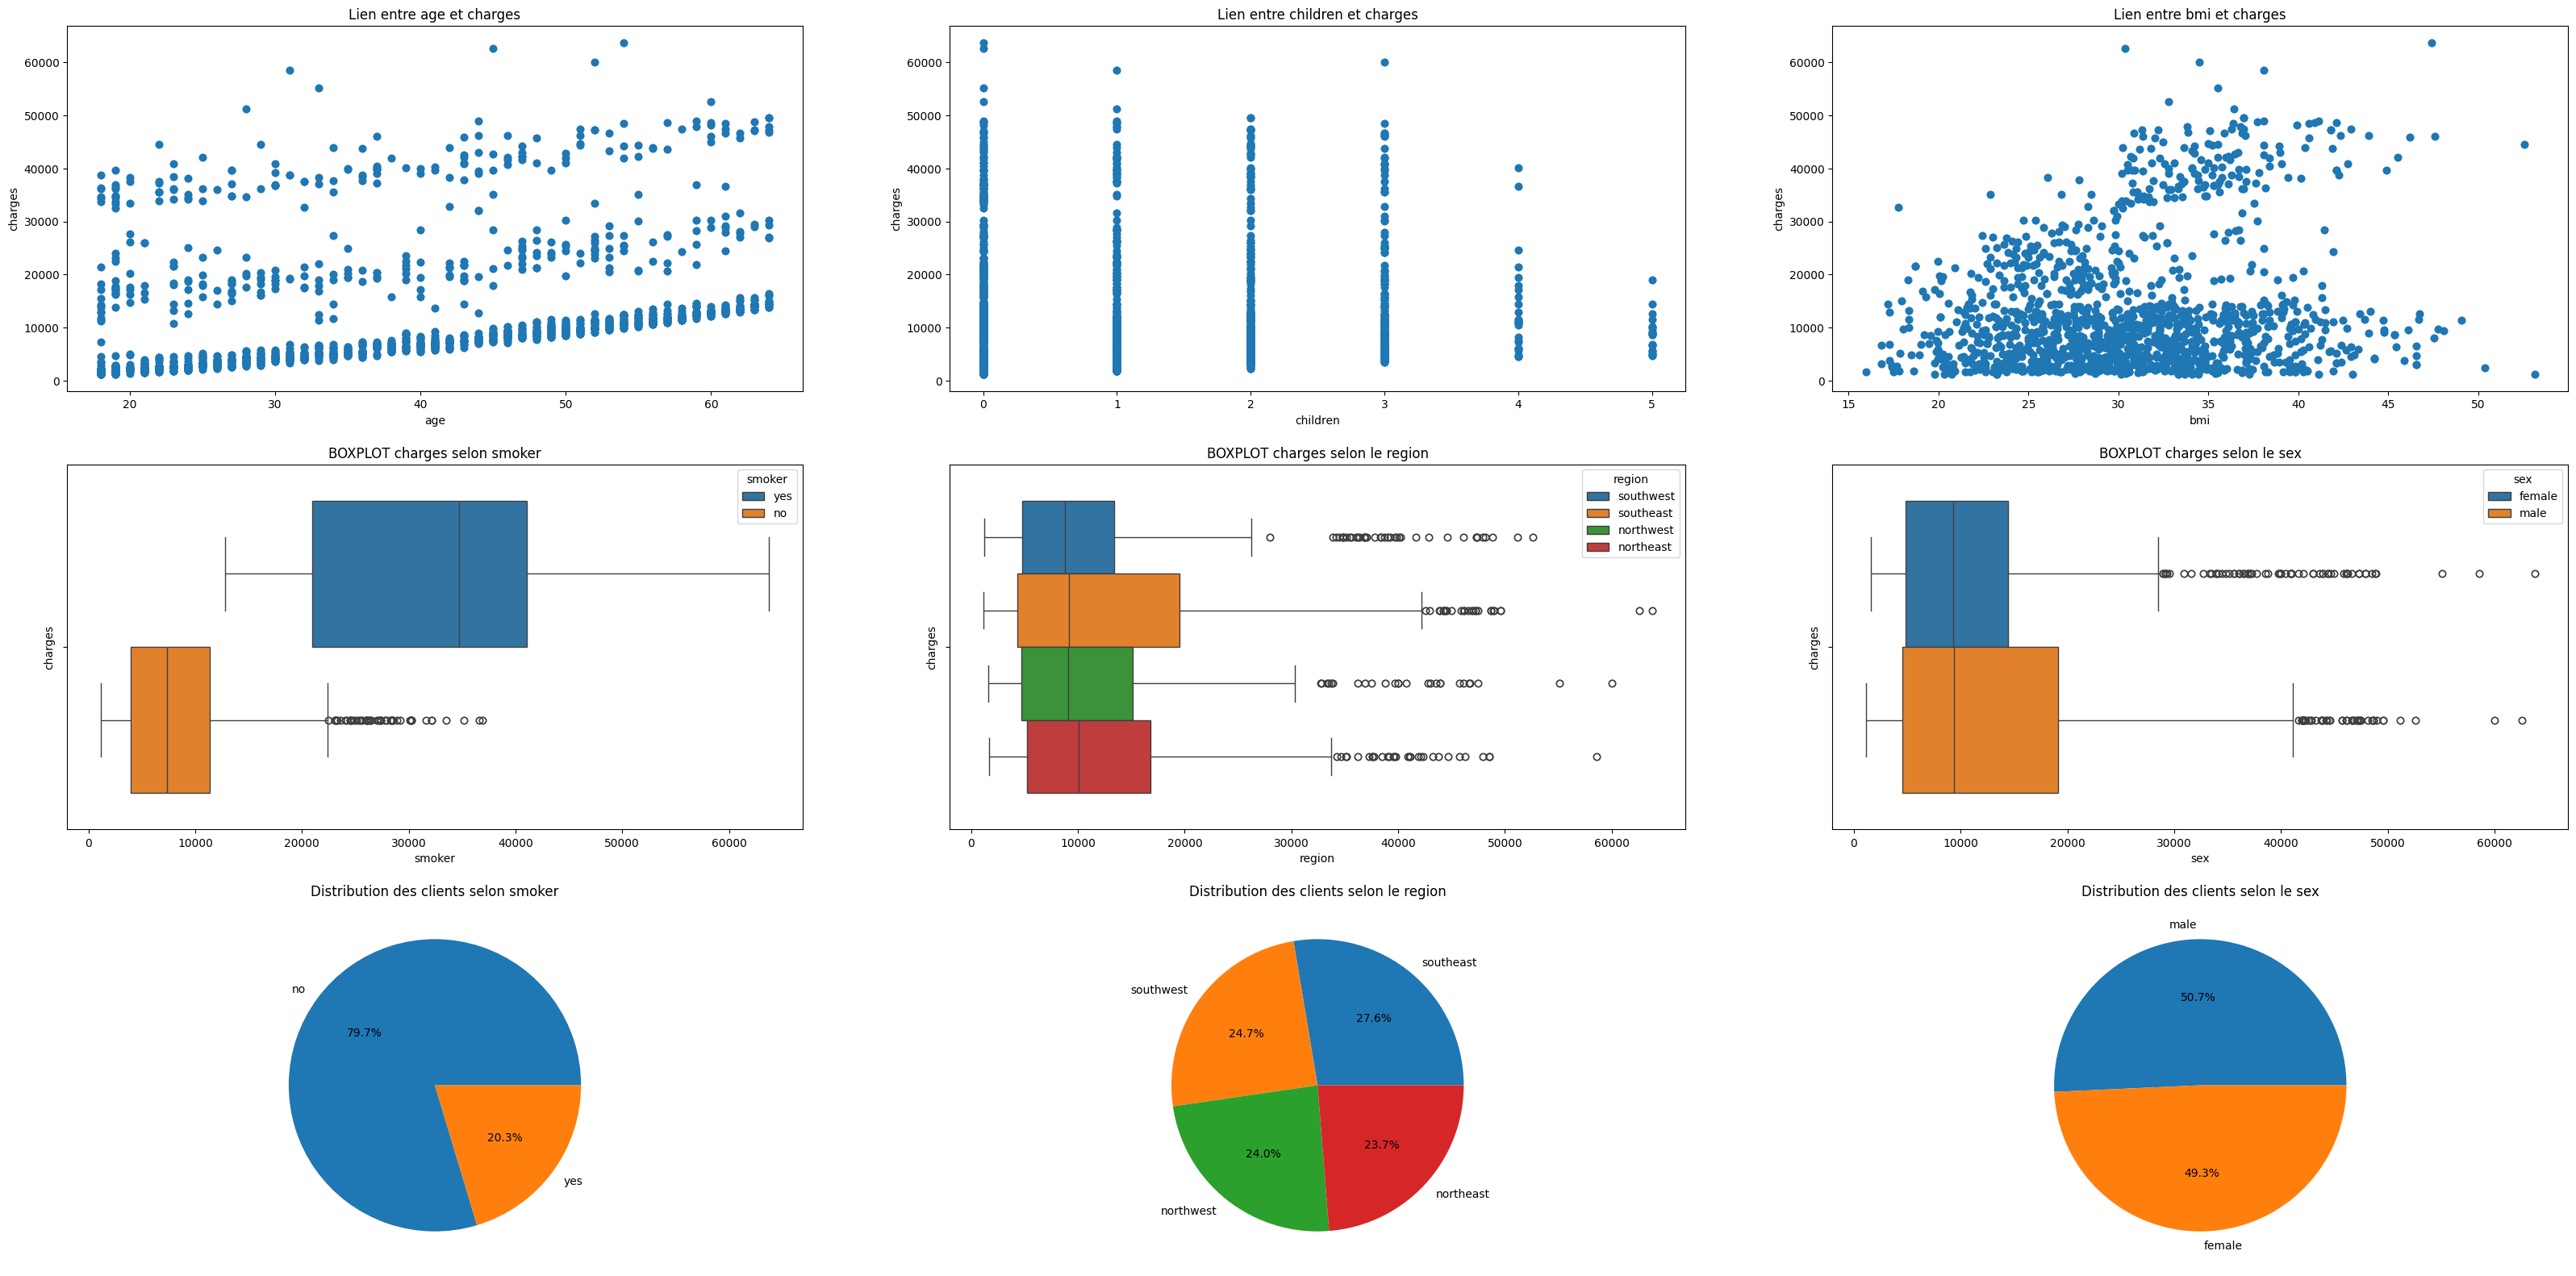

In [6]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(40,20))
axes[0][0].plot(df['age'],df['charges'],'o')
axes[0][0].set_ylabel('charges')
axes[0][0].set_xlabel('age')
axes[0][0].set_title('Lien entre age et charges')

axes[0][1].plot(df['children'],df['charges'],'o')
axes[0][1].set_ylabel('charges')
axes[0][1].set_xlabel('children')
axes[0][1].set_title('Lien entre children et charges')

axes[0][2].plot(df['bmi'],df['charges'],'o')
axes[0][2].set_ylabel('charges')
axes[0][2].set_xlabel('bmi')
axes[0][2].set_title('Lien entre bmi et charges')

sns.boxplot(x="charges",data=df,hue="smoker",ax=axes[1][0])
axes[1][0].set_ylabel('charges')
axes[1][0].set_xlabel('smoker')
axes[1][0].set_title('BOXPLOT charges selon smoker')

sns.boxplot(x="charges",data=df,hue="region",ax=axes[1][1])
axes[1][1].set_ylabel('charges')
axes[1][1].set_xlabel('region')
axes[1][1].set_title('BOXPLOT charges selon le region')

sns.boxplot(x="charges",data=df,hue="sex",ax=axes[1][2])
axes[1][2].set_ylabel('charges')
axes[1][2].set_xlabel('sex')
axes[1][2].set_title('BOXPLOT charges selon le sex')


axes[2][0].pie(x=df['smoker'].value_counts(),labels=df['smoker'].value_counts().index,autopct='%1.1f%%')

axes[2][0].set_title('Distribution des clients selon smoker')


axes[2][1].pie(x=df['region'].value_counts(),labels=df['region'].value_counts().index,autopct='%1.1f%%')

axes[2][1].set_title('Distribution des clients selon le region')



axes[2][2].pie(x=df['sex'].value_counts(),labels=df['sex'].value_counts().index,autopct='%1.1f%%')

axes[2][2].set_title('Distribution des clients selon le sex')

plt.show()

# ***Statistiques descriptives***

In [7]:
statistiques = df.groupby(['sex', 'smoker'])['charges'].describe()

statistiques

count          mean           std         min           25%  \
sex    smoker                                                                 
female no      1134.0   8756.307017   6041.623960   1607.5101   4200.566575   
       yes      232.0  30721.380703  11838.728246  13844.5060  19747.243325   
male   no      1074.0   8060.534956   5969.941470   1121.8739   3591.480000   
       yes      332.0  33272.561758  11192.832907  12829.4551  21259.377950   

                       50%           75%          max  
sex    smoker                                          
female no       7640.30920  11832.988525  36910.60803  
       yes     29045.91475  40911.257000  63770.42801  
male   no       6940.90985  10796.350250  32108.66282  
       yes     36193.40035  41949.244100  62592.87309

In [8]:
df.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,658.0,13475.874737,11310.618603,1694.7964,5209.578850,10072.05505,16776.304050,58571.07448
northwest,664.0,12463.129315,10996.174365,1621.3402,4733.635288,9081.14720,15153.617225,60021.39897
southeast,766.0,14748.777706,14138.464968,1121.8739,4349.725100,9140.95100,19534.924300,63770.42801
southwest,684.0,12164.196435,11419.830441,1241.5650,4746.344000,8790.53100,13390.559000,52590.82939


In [9]:
df['age'].describe()

,age
count,2772.000000
mean,39.109668
std,14.081459
min,18.000000
25%,26.000000
50%,39.000000
75%,51.000000
max,64.000000


In [10]:
df['bmi'].describe()

,bmi
count,2772.000000
mean,30.701349
std,6.129449
min,15.960000
25%,26.220000
50%,30.447500
75%,34.770000
max,53.130000


In [11]:
df['children'].describe()

,children
count,2772.000000
mean,1.101732
std,1.214806
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [12]:
df['charges'].describe()

,charges
count,2772.000000
mean,13261.369959
std,12151.768945
min,1121.873900
25%,4687.797000
50%,9333.014350
75%,16577.779500
max,63770.428010


# **🧹 Prétraitement**

In [13]:
map={'yes':1,'no':0}
df['smoker']=df['smoker'].map(map).astype(bool)
map_2={'male':1,'female':0}
df['sex']=df['sex'].map(map_2).astype(bool)
map_3={'southwest':'Nord','southeast':'Sud','northwest':'Est','northeast':'Ouest'}
df['region']=df['region'].map(map_3)

# **Modèle**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


Y = df['charges']
X = df.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('Variables quantitatives', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
    ('Variable qualitative', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    ('Variables binaires', 'passthrough', X.select_dtypes(include=['bool']).columns)


])






model = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)


param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

grid_model = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Variables '
                                                                         'quantitatives',
                                                                         StandardScaler(),
                                                                         Index(['age', 'bmi', 'children'], dtype='object')),
                                                                        ('Variable '
                                                                         'qualitative',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['region'], dtype='object')),
                                                                        ('Variables '
                                                                         'binaires',
                                                                         'passthrough',
                                                                         Index(['sex', 'smoker'], dtype='object'))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Y = df['charges']
X = df.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Prétraitement : standardisation des variables numériques
preprocessor = ColumnTransformer(transformers=[
    ('Variables quantitatives', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
    ('Variable qualitative', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    ('Variables binaires', 'passthrough', X.select_dtypes(include=['bool']).columns)


])

# Pipeline avec RandomForestRegressor
model = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        random_state=42,
        # Paramètres par défaut plus conservateurs
        n_jobs=-1,  # Utilise tous les processeurs disponibles
        oob_score=True  # Active le score Out-of-Bag pour évaluation
    )
)

# Grille des hyperparamètres optimisée pour éviter le surapprentissage
param_grid = {
    # Nombre d'arbres : testons des valeurs modérées
    'randomforestregressor__n_estimators': [100, 200, 300],

    # Profondeur limitée pour éviter le surapprentissage
    'randomforestregressor__max_depth': [5, 10, 15, 20],

    # Échantillon minimum pour diviser un nœud (plus élevé = moins de surapprentissage)
    'randomforestregressor__min_samples_split': [5, 10, 20],

    # Échantillon minimum par feuille (plus élevé = moins de surapprentissage)
    'randomforestregressor__min_samples_leaf': [2, 5, 10],

    # Nombre maximum de features considérées à chaque division
    'randomforestregressor__max_features': ['sqrt', 'log2', 0.5],

    # Fraction des échantillons utilisés pour chaque arbre (bootstrap)
    'randomforestregressor__max_samples': [0.7, 0.8, 0.9]
}

# Recherche par grille avec validation croisée plus robuste
grid_model = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation pour une meilleure évaluation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Parallélisation
    verbose=1,  # Affichage du progrès
    return_train_score=True  # Pour surveiller le surapprentissage
)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Variables '
                                                                         'quantitatives',
                                                                         StandardScaler(),
                                                                         Index(['age', 'bmi', 'children'], dtype='object')),
                                                                        ('Variable '
                                                                         'qualitative',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['region'], dtype='object')),
                                                                        ('Variables '
                                                                         'binaires',
                                                                         'passthrough',
                                                                         Index...
             param_grid={'randomforestregressor__max_depth': [5, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 0.5],
                         'randomforestregressor__max_samples': [0.7, 0.8, 0.9],
                         'randomforestregressor__min_samples_leaf': [2, 5, 10],
                         'randomforestregressor__min_samples_split': [5, 10,
                                                                      20],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

# ***Meilleurs hyperparamètres***

In [24]:

print("Meilleurs paramètres :", grid_model.best_params_)

Meilleurs paramètres : {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__max_samples': 0.9, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 200}


In [25]:
best_model =grid_model.best_estimator_
y_pred = best_model.predict(X_test)

# ***Évaluation***

In [26]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE : {rmse}")
print(f"R² : {r2}")
print(f"MAPE : {mape}")

RMSE : 14434647.958738538
R² : 0.9059515380648882
MAPE : 0.24265463573333487


# **Analyse des Résidus**

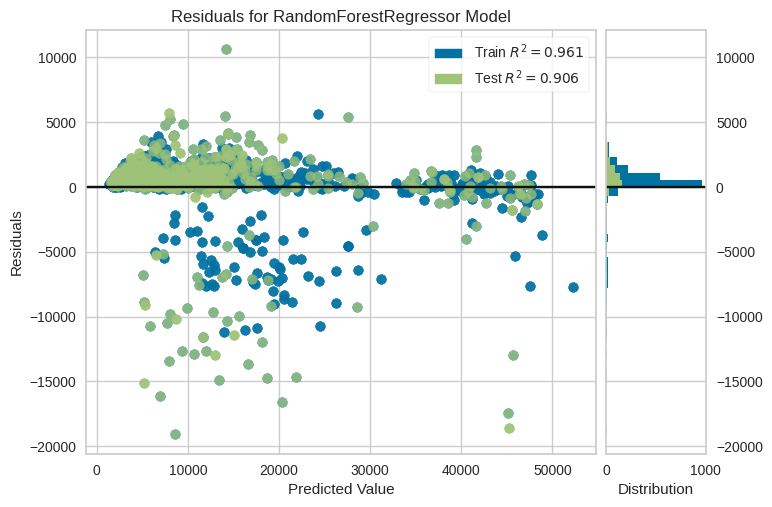

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
from yellowbrick.regressor import ResidualsPlot, prediction_error
resisdu=ResidualsPlot(best_model)
resisdu.fit(X_train,y_train)
resisdu.score(X_test,y_test)
resisdu.show()

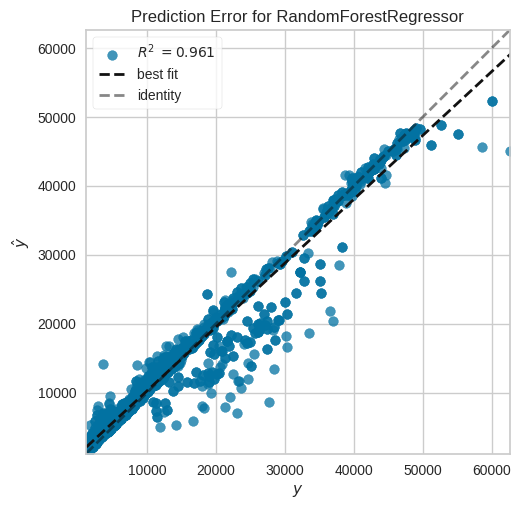

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:
from yellowbrick.regressor import prediction_error
error = prediction_error(best_model, X_train, y_train)

error.score(X_test, y_test)
error.show()

#**Sauvegarder le modèle**

In [21]:
import joblib
modele=best_model
joblib.dump(modele,'modele.pkl')

['modele.pkl']

# ***Campagne***

In [22]:
campaign=[[24,False,23,2,True,'Nord']]
x_cols=X.columns
campagne=pd.DataFrame(campaign,columns=x_cols)
campagne.to_csv('campagne.csv',index=False)
campagne

,age,sex,bmi,children,smoker,region
0,24,False,23,2,True,Nord


In [23]:
loaded_model = joblib.load('modele.pkl')
float(loaded_model.predict(campagne)[0])

18765.43773885697